# Classifier Comparison: MNIST dataset

---

### 1. Data loading 

In [41]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

plt.rcParams['figure.dpi'] = 150

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Example

In [4]:
ind = random.randint(0, X_train.shape[0]-1)

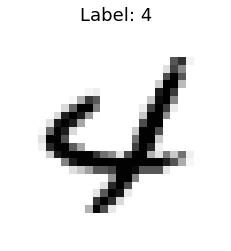

In [5]:
plt.imshow(X_train[ind], cmap="binary")
plt.axis('off')
plt.title(f'Label: {y_train[ind]}', size=18)
plt.show()

Reshape dataset *(N, 28, 28) -> (N, 28\*28)* 

In [6]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples, nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples, nx*ny))

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Sklearn utility

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import mode

Functions utility

In [9]:
def print_state(i, N, s=''):
    print(f'{s} {i+1} / {N} DONE --- {round((i+1)*100/N, 3)} %')

*Choose N inter*

In [10]:
N_iter = 10

In [11]:
x_axis = list(range(N_iter))

### 1. Single Decision Tree 

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [19]:
acc_list1 = []
acc_best1 = 0
i_best1 = 0

for i in range(N_iter):

    # Fit
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    acc_list1.append(accuracy_score(y_test, y_pred))
    print_state(i, N_iter, s=f'Fit/Predict DONE, acc={acc_list1[-1]}',)

    if (acc_list1[-1] > acc_best1):
        acc_best1 = acc_list1[-1]
        metrics_best1 = classification_report(y_test, y_pred)

Fit/Predict DONE, acc=0.8755 1 / 10 DONE --- 10.0 %
Fit/Predict DONE, acc=0.8772 2 / 10 DONE --- 20.0 %
Fit/Predict DONE, acc=0.8797 3 / 10 DONE --- 30.0 %
Fit/Predict DONE, acc=0.8767 4 / 10 DONE --- 40.0 %
Fit/Predict DONE, acc=0.8779 5 / 10 DONE --- 50.0 %
Fit/Predict DONE, acc=0.8771 6 / 10 DONE --- 60.0 %
Fit/Predict DONE, acc=0.8801 7 / 10 DONE --- 70.0 %
Fit/Predict DONE, acc=0.8741 8 / 10 DONE --- 80.0 %
Fit/Predict DONE, acc=0.8772 9 / 10 DONE --- 90.0 %
Fit/Predict DONE, acc=0.8788 10 / 10 DONE --- 100.0 %


In [20]:
print(metrics_best1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.86      0.87      1032
           3       0.83      0.86      0.84      1010
           4       0.87      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.91      0.89      0.90       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.81      0.82       974
           9       0.85      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Accuracy Plot 1

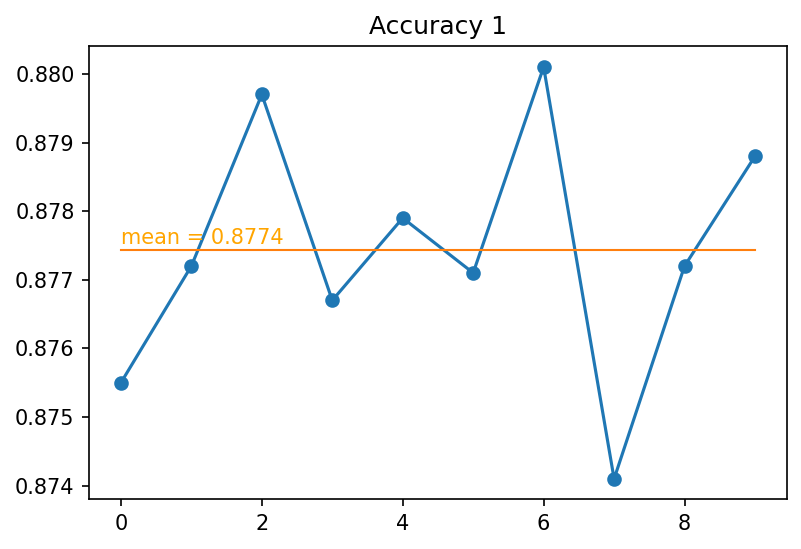

In [42]:
mean1 = sum(acc_list1)/len(acc_list1)
mean1 = [mean1]*N_iter 

plt.title(f'Accuracy 1')
plt.plot(x_axis, acc_list1, marker='o')
plt.plot(x_axis, mean1, linewidth=1)
plt.text(0, mean1[0] + 0.0001*mean1[0], f'mean = {mean1[0]:.4}', c='orange')
plt.show()

### 2. Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [60]:
acc_list2 = []
acc_best2 = 0
i_best2 = 0

for i in range(N_iter):

    # Fit
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    acc_list2.append(accuracy_score(y_test, y_pred))
    print_state(i, N_iter, s=f'Fit/Predict DONE, acc={acc_list2[-1]}',)

    if (acc_list2[-1] > acc_best2):
        acc_best2 = acc_list2[-1]
        metrics_best2 = classification_report(y_test, y_pred)

Fit/Predict DONE, acc=0.9683 1 / 10 DONE --- 10.0 %
Fit/Predict DONE, acc=0.9678 2 / 10 DONE --- 20.0 %
Fit/Predict DONE, acc=0.9691 3 / 10 DONE --- 30.0 %
Fit/Predict DONE, acc=0.9706 4 / 10 DONE --- 40.0 %
Fit/Predict DONE, acc=0.9699 5 / 10 DONE --- 50.0 %
Fit/Predict DONE, acc=0.9683 6 / 10 DONE --- 60.0 %
Fit/Predict DONE, acc=0.9702 7 / 10 DONE --- 70.0 %
Fit/Predict DONE, acc=0.9706 8 / 10 DONE --- 80.0 %
Fit/Predict DONE, acc=0.9691 9 / 10 DONE --- 90.0 %
Fit/Predict DONE, acc=0.9709 10 / 10 DONE --- 100.0 %


In [65]:
acc_list2

[0.9683,
 0.9678,
 0.9691,
 0.9706,
 0.9699,
 0.9683,
 0.9702,
 0.9706,
 0.9691,
 0.9709]

In [66]:
_acc_list2_freeze = [0.9683, 0.9678, 0.9691, 0.9706, 0.9699, 0.9683, 0.9702, 0.9706, 0.9691,0.9709]

In [67]:
print(metrics_best2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Accuracy Plot 2

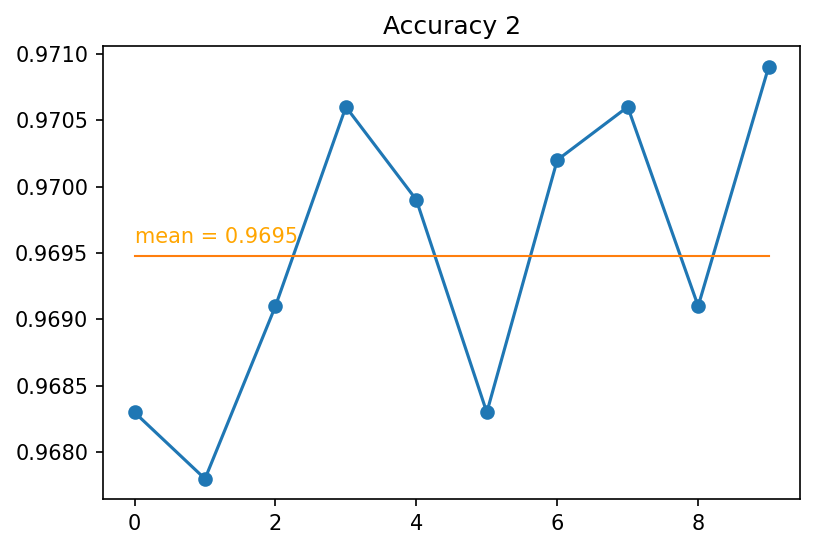

In [68]:
mean2 = sum(acc_list2)/len(acc_list2)
mean2 = [mean2]*N_iter 

plt.title(f'Accuracy 2')
plt.plot(x_axis, acc_list2, marker='o')
plt.plot(x_axis, mean2, linewidth=1)
plt.text(0, mean2[0] + 0.0001*mean2[0], f'mean = {mean2[0]:.4}', c='orange')
plt.show()

### 3. Custom Random forest

Class design

In [70]:
class MyRandomForestClassifier():

    def __init__(self, n_estimators, max_features):
        self.N = n_estimators
        self.B = max_features

    # train the trees of this random forest using subsets of X (and y)
    def fit(self, X, y):

        self.clf_list = []
        
        for i in range(self.N):

            clfi = DecisionTreeClassifier(max_features=self.B)
            clfi.fit(X, y)
            print_state(i, self.N, s=f'FIT tree {i}')
            self.clf_list.append(clfi)

        self.clf_list = np.array(self.clf_list)

    # predict the label for each point in X
    def predict(self, X):

        self.y_pred_list = []

        for i in range(self.N):

            y_pred_i = self.clf_list[i].predict(X)
            self.y_pred_list.append(y_pred_i)
            
        self.y_pred_list = np.array(self.y_pred_list)

        return mode(self.y_pred_list, keepdims=True)[0][0]

In [71]:
frac = 0.8
B = X_train.shape[1]

*Set N of DcisionTree in Random Forest*

In [72]:
N = 3

In [73]:
clf = MyRandomForestClassifier(N, int(frac*B))

In [74]:
acc_list3 = []
acc_best3 = 0
i_best3 = 0

for i in range(N_iter):

    # Fit
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    acc_list3.append(accuracy_score(y_test, y_pred))
    print_state(i, N_iter, s=f'Fit/Predict {i} DONE, acc={acc_list3[-1]}, ',)

    if (acc_list3[-1] > acc_best3):
        acc_best3 = acc_list3[-1]
        metrics_best3 = classification_report(y_test, y_pred)

FIT tree 0 1 / 3 DONE --- 33.333 %
FIT tree 1 2 / 3 DONE --- 66.667 %
FIT tree 2 3 / 3 DONE --- 100.0 %
Fit/Predict 0 DONE, acc=0.9105,  1 / 10 DONE --- 10.0 %
FIT tree 0 1 / 3 DONE --- 33.333 %
FIT tree 1 2 / 3 DONE --- 66.667 %
FIT tree 2 3 / 3 DONE --- 100.0 %
Fit/Predict 1 DONE, acc=0.9052,  2 / 10 DONE --- 20.0 %
FIT tree 0 1 / 3 DONE --- 33.333 %
FIT tree 1 2 / 3 DONE --- 66.667 %
FIT tree 2 3 / 3 DONE --- 100.0 %
Fit/Predict 2 DONE, acc=0.9173,  3 / 10 DONE --- 30.0 %
FIT tree 0 1 / 3 DONE --- 33.333 %
FIT tree 1 2 / 3 DONE --- 66.667 %
FIT tree 2 3 / 3 DONE --- 100.0 %
Fit/Predict 3 DONE, acc=0.9003,  4 / 10 DONE --- 40.0 %
FIT tree 0 1 / 3 DONE --- 33.333 %
FIT tree 1 2 / 3 DONE --- 66.667 %
FIT tree 2 3 / 3 DONE --- 100.0 %
Fit/Predict 4 DONE, acc=0.8993,  5 / 10 DONE --- 50.0 %
FIT tree 0 1 / 3 DONE --- 33.333 %
FIT tree 1 2 / 3 DONE --- 66.667 %
FIT tree 2 3 / 3 DONE --- 100.0 %
Fit/Predict 5 DONE, acc=0.9144,  6 / 10 DONE --- 60.0 %
FIT tree 0 1 / 3 DONE --- 33.333 %
FIT t

In [75]:
acc_list3

[0.9105,
 0.9052,
 0.9173,
 0.9003,
 0.8993,
 0.9144,
 0.9052,
 0.9093,
 0.9083,
 0.9147]

In [76]:
_acc_list3_freeze= [0.9019, 0.9076, 0.9096, 0.9126,  0.9029, 0.9054, 0.9112, 0.9055, 0.9008, 0.907]

In [77]:
print(metrics_best3)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       980
           1       0.93      0.99      0.96      1135
           2       0.88      0.92      0.90      1032
           3       0.87      0.90      0.89      1010
           4       0.91      0.94      0.92       982
           5       0.90      0.87      0.89       892
           6       0.96      0.92      0.94       958
           7       0.96      0.92      0.94      1028
           8       0.94      0.84      0.89       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Accuracy Plot 3

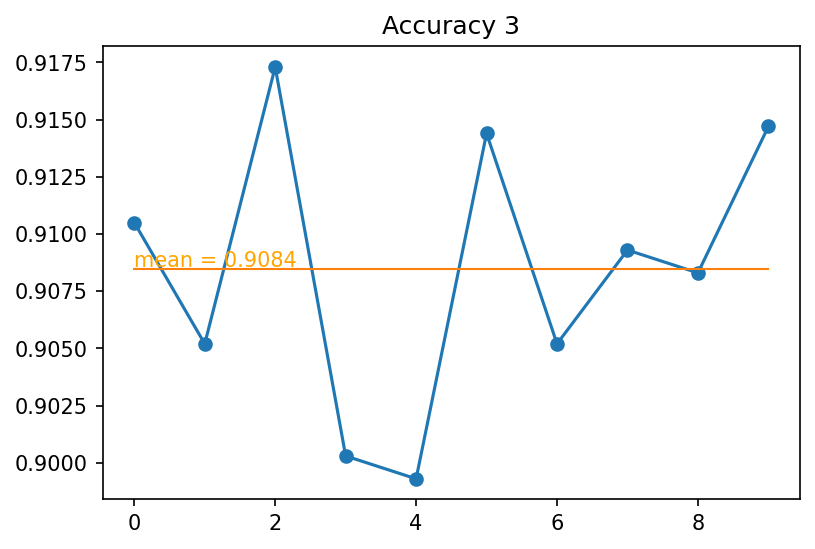

In [78]:
mean3 = sum(acc_list3)/len(acc_list3)
mean3 = [mean3]*N_iter 

plt.title(f'Accuracy 3')
plt.plot(x_axis, acc_list3, marker='o')
plt.plot(x_axis, mean3, linewidth=1)
plt.text(0, mean3[0] + 0.0001*mean3[0], f'mean = {mean3[0]:.4}', c='orange')
plt.show()

# Summary

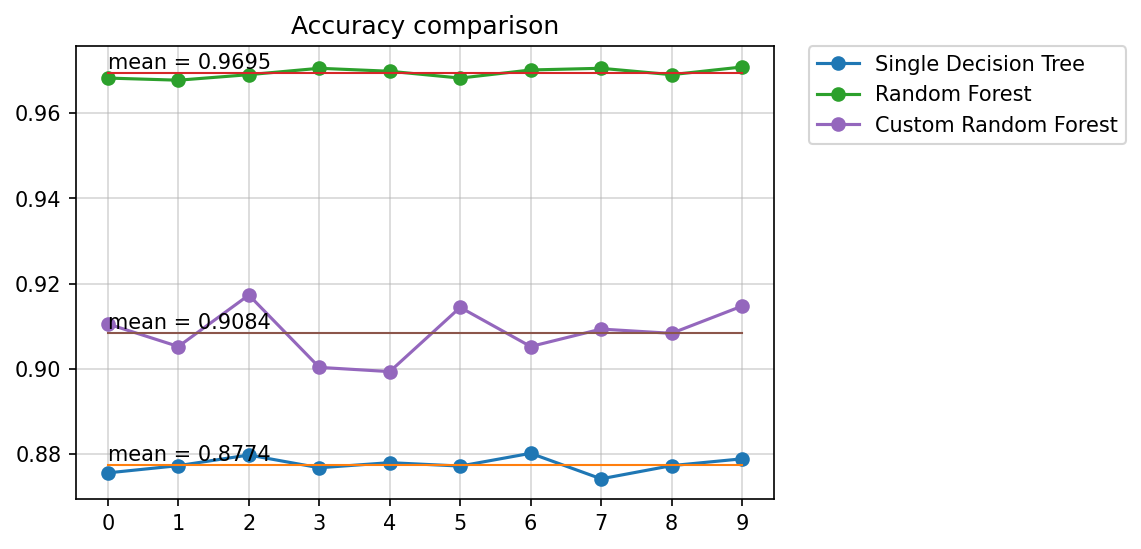

In [94]:
plt.title(f'Accuracy comparison')
k = 0.001

# 1. Single Decision Tree
plt.plot(x_axis, acc_list1, marker='o', label=f'Single Decision Tree')
plt.plot(x_axis, mean1, linewidth=1)
plt.text(0, mean1[0] + k*mean1[0], f'mean = {mean1[0]:.4}')

# 2. Random Forest
plt.plot(x_axis, acc_list2, marker='o', label=f'Random Forest')
plt.plot(x_axis, mean2, linewidth=1)
plt.text(0, mean2[0] + k*mean2[0], f'mean = {mean2[0]:.4}')

# 1. Custom Random Forest
plt.plot(x_axis, acc_list3, marker='o', label=f'Custom Random Forest')
plt.plot(x_axis, mean3, linewidth=1)
plt.text(0, mean3[0] + k*mean3[0], f'mean = {mean3[0]:.4}')

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0.)
plt.grid(alpha=0.5)
plt.locator_params(nbins=10)
plt.show()